In [20]:
import sys
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
import seaborn as sns
import patsy as pt
import pymc3 as pm

plt.rcParams['figure.figsize'] = 14, 6
np.random.seed(0)
print('Running on PyMC3 v{}'.format(pm.__version__))
import os
import ast
import arviz as az
import arviz as az
import theano.tensor as tt
import pickle

Running on PyMC3 v3.8


In [2]:
# Define repositories and filenames 
figures_dir = './figures'
noncovid_data_dir = './data/non_covid_data'

# Alexandria: filenames
alexandria_dir = os.path.join(noncovid_data_dir, 'Alexandria')
demographic_alexandria_filename = os.path.join(alexandria_dir, 'demographic_number_info_alexandria_covid.csv')
economic_alexandria_filename = os.path.join(alexandria_dir, 'economic_number_info_alexandria_covid.csv')
housing_alexandria_filename = os.path.join(alexandria_dir, 'housing_number_info_alexandria_covid.csv')
social_alexandria_filename = os.path.join(alexandria_dir, 'social_number_info_alexandria_covid.csv')
percent_demographic_alexandria_filename = os.path.join(alexandria_dir, 'demographic_percent_info_alexandria_covid.csv')
percent_economic_alexandria_filename = os.path.join(alexandria_dir, 'economic_percent_info_alexandria_covid.csv')
percent_housing_alexandria_filename = os.path.join(alexandria_dir, 'housing_percent_info_alexandria_covid.csv')
percent_social_alexandria_filename = os.path.join(alexandria_dir, 'social_percent_info_alexandria_covid.csv')

# st_louis: filenames
st_louis_dir = os.path.join(noncovid_data_dir, 'StLouis')
demographic_st_louis_filename = os.path.join(st_louis_dir, 'demographic_number_info_st_louis_covid.csv')
economic_st_louis_filename = os.path.join(st_louis_dir, 'economic_number_info_st_louis_covid.csv')
housing_st_louis_filename = os.path.join(st_louis_dir, 'housing_number_info_st_louis_covid.csv')
social_st_louis_filename = os.path.join(st_louis_dir, 'social_number_info_st_louis_covid.csv')
percent_demographic_st_louis_filename = os.path.join(st_louis_dir, 'demographic_percent_info_st_louis_covid.csv')
percent_economic_st_louis_filename = os.path.join(st_louis_dir, 'economic_percent_info_st_louis_covid.csv')
percent_housing_st_louis_filename = os.path.join(st_louis_dir, 'housing_percent_info_st_louis_covid.csv')
percent_social_st_louis_filename = os.path.join(st_louis_dir, 'social_percent_info_st_louis_covid.csv')

# chicago: filenames
chicago_covid_filename = './data/covid_data/processed/chicago_covid.csv'
chicago_dir = os.path.join(noncovid_data_dir, 'Chicago')
demographic_chicago_filename = os.path.join(chicago_dir, 'demographic_number_info_CHICAGO.csv')
economic_chicago_filename = os.path.join(chicago_dir, 'economic_number_info_CHICAGO.csv')
housing_chicago_filename = os.path.join(chicago_dir, 'housing_number_info_CHICAGO.csv')
social_chicago_filename = os.path.join(chicago_dir, 'social_number_info_CHICAGO.csv')
percent_demographic_chicago_filename = os.path.join(chicago_dir, 'demographic_percent_info_CHICAGO.csv')
percent_economic_chicago_filename = os.path.join(chicago_dir, 'economic_percent_info_CHICAGO.csv')
percent_housing_chicago_filename = os.path.join(chicago_dir, 'housing_percent_info_CHICAGO.csv')
percent_social_chicago_filename = os.path.join(chicago_dir, 'social_percent_info_CHICAGO.csv')

# houston: filenames
houston_dir = os.path.join(noncovid_data_dir, 'Houston')
demographic_houston_filename = os.path.join(houston_dir, 'demographic_number_info_houston_covid.csv')
economic_houston_filename = os.path.join(houston_dir, 'economic_number_info_houston_covid.csv')
housing_houston_filename = os.path.join(houston_dir, 'housing_number_info_houston_covid.csv')
social_houston_filename = os.path.join(houston_dir, 'social_number_info_houston_covid.csv')
percent_demographic_houston_filename = os.path.join(houston_dir, 'demographic_percent_info_houston_covid.csv')
percent_economic_houston_filename = os.path.join(houston_dir, 'economic_percent_info_houston_covid.csv')
percent_housing_houston_filename = os.path.join(houston_dir, 'housing_percent_info_houston_covid.csv')
percent_social_houston_filename = os.path.join(houston_dir, 'social_percent_info_houston_covid.csv')

# NY: filenames
NY_covid_filename = './data/covid_data/processed/NY_covid.csv'
NY_dir = os.path.join(noncovid_data_dir, 'NY')
demographic_NY_filename = os.path.join(NY_dir, 'demographic_number_info_NY.csv')
economic_NY_filename = os.path.join(NY_dir, 'economic_number_info_NY.csv')
housing_NY_filename = os.path.join(NY_dir, 'housing_number_info_NY.csv')
social_NY_filename = os.path.join(NY_dir, 'social_number_info_NY.csv')
percent_demographic_NY_filename = os.path.join(NY_dir, 'demographic_percent_info_NY.csv')
percent_economic_NY_filename = os.path.join(NY_dir, 'economic_percent_info_NY.csv')
percent_housing_NY_filename = os.path.join(NY_dir, 'housing_percent_info_NY.csv')
percent_social_NY_filename = os.path.join(NY_dir, 'social_percent_info_NY.csv')


All data was updated on May 31, 2020 so it is reflective of the numbers that were published by that date. 


In [287]:
## Load data

# Alexandria 

raw_alexandria_df = pd.read_csv(demographic_alexandria_filename)[['zipcode','covid_cases','D1. AGE.Total population']]
percent_demographic_alexandria_df = pd.read_csv(percent_demographic_alexandria_filename)
economic_alexandria_df = pd.read_csv(economic_alexandria_filename)
percent_housing_alexandria_df = pd.read_csv(percent_housing_alexandria_filename)
social_alexandria_df = pd.read_csv(social_alexandria_filename)

# St Louis

raw_st_louis_df = pd.read_csv(demographic_st_louis_filename)[['zipcode','covid_cases','D1. AGE.Total population']]
percent_demographic_st_louis_df = pd.read_csv(percent_demographic_st_louis_filename)
economic_st_louis_df = pd.read_csv(economic_st_louis_filename)
percent_housing_st_louis_df = pd.read_csv(percent_housing_st_louis_filename)
social_st_louis_df = pd.read_csv(social_st_louis_filename)

# Chicago
raw_chicago_df = pd.read_csv(demographic_chicago_filename)[['zipcode','D1. AGE.Total population']]
covid_chicago_df = pd.read_csv(chicago_covid_filename)[['zcta','covid_cases']]
covid_chicago_df.rename({'zcta': 'zipcode'}, inplace=True, axis=1)
percent_demographic_chicago_df = pd.read_csv(percent_demographic_chicago_filename)
economic_chicago_df = pd.read_csv(economic_chicago_filename)
percent_housing_chicago_df = pd.read_csv(percent_housing_chicago_filename)
social_chicago_df = pd.read_csv(social_chicago_filename)

# Houston
raw_houston_df = pd.read_csv(demographic_houston_filename)[['zipcode','covid_cases','D1. AGE.Total population']]
percent_demographic_houston_df = pd.read_csv(percent_demographic_houston_filename)
economic_houston_df = pd.read_csv(economic_houston_filename)
percent_housing_houston_df = pd.read_csv(percent_housing_houston_filename)
social_houston_df = pd.read_csv(social_houston_filename)

# NY 
raw_NY_df = pd.read_csv(demographic_NY_filename)[['zipcode','D1. AGE.Total population']]
covid_NY_df = pd.read_csv(NY_covid_filename)[['zcta','covid_cases']]
covid_NY_df.rename({'zcta': 'zipcode'}, inplace=True, axis=1)
percent_demographic_NY_df = pd.read_csv(percent_demographic_NY_filename)
economic_NY_df = pd.read_csv(economic_NY_filename)
percent_housing_NY_df = pd.read_csv(percent_housing_NY_filename)
social_NY_df = pd.read_csv(social_NY_filename)

In [288]:
raw_NY_df = pd.merge(raw_NY_df, covid_NY_df, how='inner',on='zipcode')
raw_chicago_df = pd.merge(raw_chicago_df, covid_chicago_df, how='inner',on='zipcode')

In [306]:
def merge_dataframes(df, social_df, demographic_df, economic_df, city_name):
    
    df  = pd.merge(df, social_df[['zipcode','S1. HOUSEHOLDS BY TYPE.Average household size']], \
                      on='zipcode', how='inner')
    df = pd.merge(df, demographic_df[['zipcode','D3. RACE.White alone','D1. AGE.Under 18 years of age',\
                                     'D1. AGE.65 years and over']], on='zipcode',how='inner')
    df = pd.merge(df, economic_df[['zipcode','E1. HOUSEHOLD INCOME AND BENEFITS.Median household income',\
                                  'E8. WORKERS BY OCCUPATION.Service occupations']])
    df['proportion minority'] = (100 - df['D3. RACE.White alone'].astype(float))/100
    df.rename({'S1. HOUSEHOLDS BY TYPE.Average household size': 'avg household size',\
              'E8. WORKERS BY OCCUPATION.Service occupations': 'service occupations',
              'D1. AGE.Under 18 years of age':'young prop',\
              'D1. AGE.65 years and over': 'elderly prop'},axis=1,inplace=True)
    df['avg household size'] = df['avg household size'].apply(lambda x: float(x) if x!='-' else np.nan)
    df['population'] = df['D1. AGE.Total population'].apply(lambda x: int("".join(x.split(','))) if x!='-' else np.nan)
    df['population'] = df['D1. AGE.Total population'].apply(lambda x: int("".join(x.split(','))) if x!='-' else np.nan)
    df['young prop'] = df['young prop'].astype(float)
    df['elderly prop'] = df['elderly prop'].astype(float)
    df['covid rate'] = df['covid_cases']/df['population']
    df['service prop'] = df['service occupations'].apply(lambda x: int("".join(x.split(','))) if x!='-' else np.nan) / df['population']
    df['median income'] = df['E1. HOUSEHOLD INCOME AND BENEFITS.Median household income'].apply(lambda x: \
                                        int("".join(x[1:].split(',')))if x!='-' else np.nan)
    
    
    df.drop(['D1. AGE.Total population','D3. RACE.White alone',\
            'E1. HOUSEHOLD INCOME AND BENEFITS.Median household income'],axis=1,inplace=True)
    
    df['city'] = city_name
    df.dropna(inplace=True)
    
    return df
    
    

In [307]:
NY_df = merge_dataframes(raw_NY_df, social_NY_df, percent_demographic_NY_df, economic_NY_df, 'NY')
chicago_df = merge_dataframes(raw_chicago_df, social_chicago_df, percent_demographic_chicago_df, economic_chicago_df, \
                              'Chicago')
alexandria_df = merge_dataframes(raw_alexandria_df, social_alexandria_df, percent_demographic_alexandria_df, \
                                 economic_alexandria_df, 'Alexandria')
houston_df = merge_dataframes(raw_houston_df, social_houston_df, percent_demographic_houston_df, \
                                 economic_houston_df, 'Houston')
st_louis_df = merge_dataframes(raw_st_louis_df, social_st_louis_df, percent_demographic_st_louis_df, \
                                 economic_st_louis_df, 'St Louis')

data = pd.concat([NY_df, chicago_df, alexandria_df, houston_df, st_louis_df])

In [308]:
high_income_min = np.quantile(data['median income'],2/3)
low_income_max = np.quantile(data['median income'],1/3)
high_income_index = data['median income'] > high_income_min
low_income_index = data['median income'] < low_income_max
data['income strata'] = 'medium'
data['income strata'].loc[high_income_index] = 'high'
data['income strata'].loc[low_income_index] = 'low'

high_minority_min = np.quantile(data['proportion minority'],2/3)
low_minority_max = np.quantile(data['proportion minority'],1/3)
high_minority_index = data['proportion minority'] > high_minority_min
low_minority_index = data['proportion minority'] < low_minority_max
data['minority strata'] = 'medium'
data['minority strata'].loc[high_minority_index] = 'high'
data['minority strata'].loc[low_minority_index] = 'low'


print(' High Income Min: ', high_income_min)
print(' Low Income Max: ', low_income_max)
print(' High Minority Min: ', high_minority_min)
print(' Low Minority Max: ', low_minority_max)
print(" ------------------- ")


 High Income Min:  76988.0
 Low Income Max:  51277.0
 High Minority Min:  0.5670000000000001
 Low Minority Max:  0.285
 ------------------- 


/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:200: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)


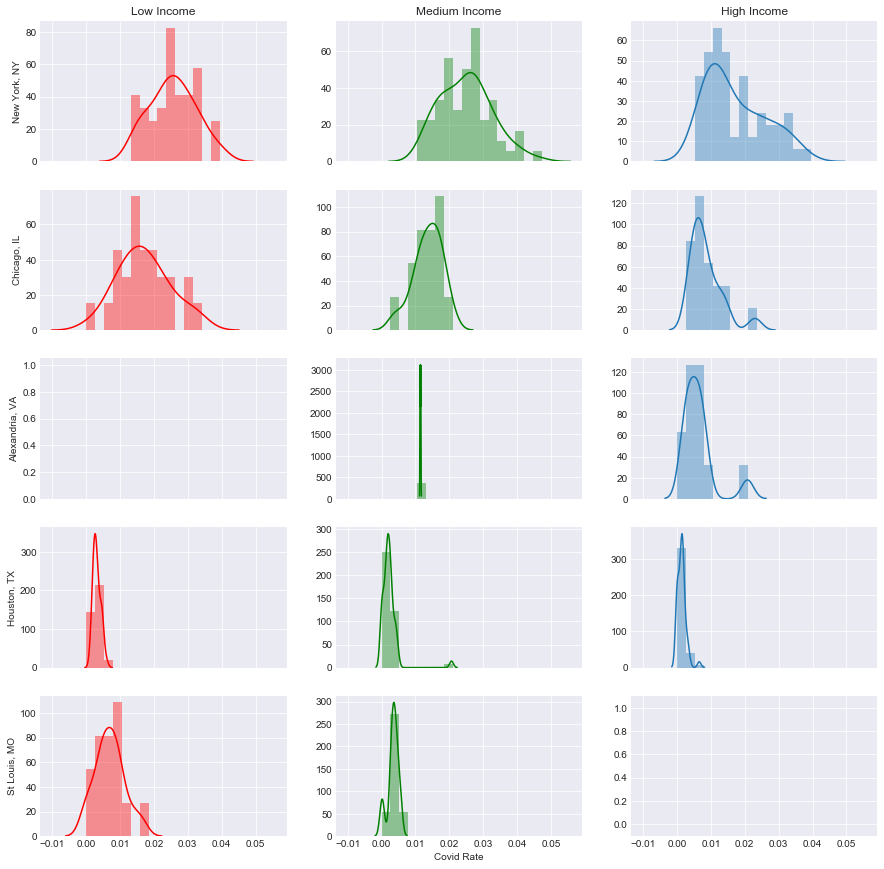

In [309]:
f, axes = plt.subplots(5, 3, figsize=(15, 15), sharex=True)
bins = np.linspace(0, 0.05,20)

sns.distplot(data[(data['city']=='NY') & (data['income strata']=='low')]['covid rate'], ax=axes[0][0],hist=True,bins=bins,color='red')
sns.distplot(data[(data['city']=='NY') & (data['income strata']=='medium')]['covid rate'], ax=axes[0][1],hist=True,bins=bins, color='green')
sns.distplot(data[(data['city']=='NY') & (data['income strata']=='high')]['covid rate'], ax=axes[0][2],hist=True,bins=bins)
axes[0][0].set_ylabel('New York, NY')

sns.distplot(data[(data['city']=='Chicago') & (data['income strata']=='low')]['covid rate'], ax=axes[1][0],hist=True,bins=bins,color='red')
sns.distplot(data[(data['city']=='Chicago') & (data['income strata']=='medium')]['covid rate'], ax=axes[1][1],hist=True,bins=bins,color='green')
sns.distplot(data[(data['city']=='Chicago') & (data['income strata']=='high')]['covid rate'], ax=axes[1][2],hist=True,bins=bins)
axes[1][0].set_ylabel('Chicago, IL')

sns.distplot(data[(data['city']=='Alexandria') & (data['income strata']=='low')]['covid rate'], ax=axes[2][0],hist=True,bins=bins, color='red')
sns.distplot(data[(data['city']=='Alexandria') & (data['income strata']=='medium')]['covid rate'], ax=axes[2][1],hist=True,bins=bins, color='green')
sns.distplot(data[(data['city']=='Alexandria') & (data['income strata']=='high')]['covid rate'], ax=axes[2][2],hist=True,bins=bins)
axes[2][0].set_ylabel('Alexandria, VA')

sns.distplot(data[(data['city']=='Houston') & (data['income strata']=='low')]['covid rate'], ax=axes[3][0],hist=True,bins=bins, color='red')
sns.distplot(data[(data['city']=='Houston') & (data['income strata']=='medium')]['covid rate'], ax=axes[3][1],hist=True,bins=bins, color='green')
sns.distplot(data[(data['city']=='Houston') & (data['income strata']=='high')]['covid rate'], ax=axes[3][2],hist=True,bins=bins)
axes[3][0].set_ylabel('Houston, TX')

sns.distplot(data[(data['city']=='St Louis') & (data['income strata']=='low')]['covid rate'], ax=axes[4][0],hist=True,bins=bins, color='red')
sns.distplot(data[(data['city']=='St Louis') & (data['income strata']=='medium')]['covid rate'], ax=axes[4][1],hist=True,bins=bins,color='green')
sns.distplot(data[(data['city']=='St Louis') & (data['income strata']=='high')]['covid rate'], ax=axes[4][2],hist=True,bins=bins)
axes[4][0].set_ylabel('St Louis, MO')


for i in range(5):
    for j in range(3):
        axes[i][j].set_xlabel('')
        

axes[4][1].set_xlabel('Covid Rate')
axes[0][0].set_title('Low Income')
axes[0][1].set_title('Medium Income')
axes[0][2].set_title('High Income')

plt.savefig(os.path.join(figures_dir, 'histogram_subplots_income'),dpi=300)

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:200: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)


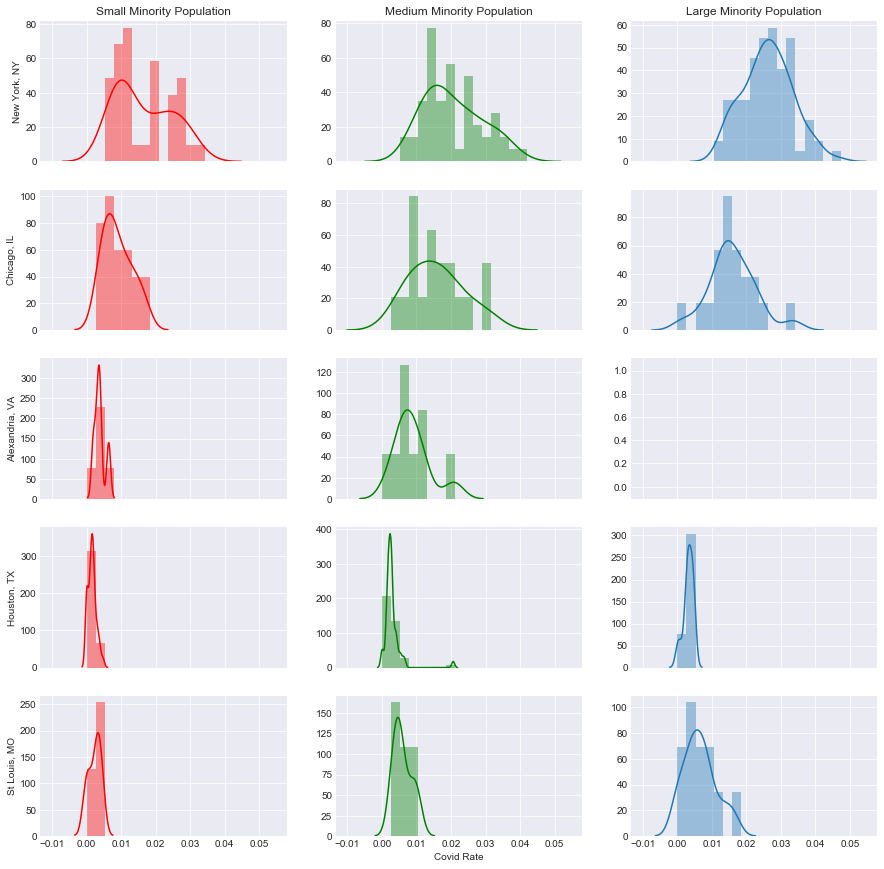

In [310]:
f, axes = plt.subplots(5, 3, figsize=(15, 15), sharex=True)
bins = np.linspace(0, 0.05,20)

sns.distplot(data[(data['city']=='NY') & (data['minority strata']=='low')]['covid rate'], ax=axes[0][0],hist=True,bins=bins,color='red')
sns.distplot(data[(data['city']=='NY') & (data['minority strata']=='medium')]['covid rate'], ax=axes[0][1],hist=True,bins=bins, color='green')
sns.distplot(data[(data['city']=='NY') & (data['minority strata']=='high')]['covid rate'], ax=axes[0][2],hist=True,bins=bins)
axes[0][0].set_ylabel('New York, NY')

sns.distplot(data[(data['city']=='Chicago') & (data['minority strata']=='low')]['covid rate'], ax=axes[1][0],hist=True,bins=bins,color='red')
sns.distplot(data[(data['city']=='Chicago') & (data['minority strata']=='medium')]['covid rate'], ax=axes[1][1],hist=True,bins=bins,color='green')
sns.distplot(data[(data['city']=='Chicago') & (data['minority strata']=='high')]['covid rate'], ax=axes[1][2],hist=True,bins=bins)
axes[1][0].set_ylabel('Chicago, IL')

sns.distplot(data[(data['city']=='Alexandria') & (data['minority strata']=='low')]['covid rate'], ax=axes[2][0],hist=True,bins=bins, color='red')
sns.distplot(data[(data['city']=='Alexandria') & (data['minority strata']=='medium')]['covid rate'], ax=axes[2][1],hist=True,bins=bins, color='green')
sns.distplot(data[(data['city']=='Alexandria') & (data['minority strata']=='high')]['covid rate'], ax=axes[2][2],hist=True,bins=bins)
axes[2][0].set_ylabel('Alexandria, VA')

sns.distplot(data[(data['city']=='Houston') & (data['minority strata']=='low')]['covid rate'], ax=axes[3][0],hist=True,bins=bins, color='red')
sns.distplot(data[(data['city']=='Houston') & (data['minority strata']=='medium')]['covid rate'], ax=axes[3][1],hist=True,bins=bins, color='green')
sns.distplot(data[(data['city']=='Houston') & (data['minority strata']=='high')]['covid rate'], ax=axes[3][2],hist=True,bins=bins)
axes[3][0].set_ylabel('Houston, TX')

sns.distplot(data[(data['city']=='St Louis') & (data['minority strata']=='low')]['covid rate'], ax=axes[4][0],hist=True,bins=bins, color='red')
sns.distplot(data[(data['city']=='St Louis') & (data['minority strata']=='medium')]['covid rate'], ax=axes[4][1],hist=True,bins=bins,color='green')
sns.distplot(data[(data['city']=='St Louis') & (data['minority strata']=='high')]['covid rate'], ax=axes[4][2],hist=True,bins=bins)
axes[4][0].set_ylabel('St Louis, MO')


for i in range(5):
    for j in range(3):
        axes[i][j].set_xlabel('')
        

axes[4][1].set_xlabel('Covid Rate')
axes[0][0].set_title('Small Minority Population')
axes[0][1].set_title('Medium Minority Population')
axes[0][2].set_title('Large Minority Population')

plt.savefig(os.path.join(figures_dir, 'histogram_subplots_minority'),dpi=300)

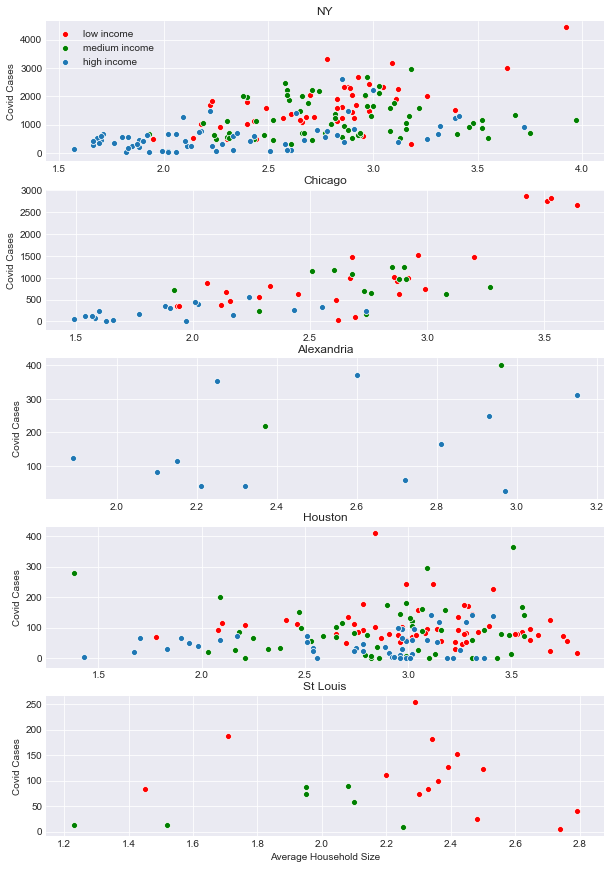

In [313]:
plt.figure(figsize=(10,15))
plt.subplot(511)
sns.scatterplot(data[(data['city']=='NY') & (data['income strata']=='low')]['avg household size'], \
         data[(data['city']=='NY') & (data['income strata']=='low')]['covid_cases'], color='red',label='low income')
sns.scatterplot(data[(data['city']=='NY') & (data['income strata']=='medium')]['avg household size'], \
         data[(data['city']=='NY') & (data['income strata']=='medium')]['covid_cases'], color='green',label='medium income')
sns.scatterplot(data[(data['city']=='NY') & (data['income strata']=='high')]['avg household size'], \
         data[(data['city']=='NY') & (data['income strata']=='high')]['covid_cases'], label='high income')
plt.legend()
plt.title('NY')
plt.xlabel(' ')
plt.ylabel('Covid Cases')

plt.subplot(512)
sns.scatterplot(data[(data['city']=='Chicago') & (data['income strata']=='low')]['avg household size'], \
         data[(data['city']=='Chicago') & (data['income strata']=='low')]['covid_cases'], color='red')
sns.scatterplot(data[(data['city']=='Chicago') & (data['income strata']=='medium')]['avg household size'], \
         data[(data['city']=='Chicago') & (data['income strata']=='medium')]['covid_cases'], color='green')
sns.scatterplot(data[(data['city']=='Chicago') & (data['income strata']=='high')]['avg household size'], \
         data[(data['city']=='Chicago') & (data['income strata']=='high')]['covid_cases'])
plt.title('Chicago')
plt.xlabel(' ')
plt.ylabel('Covid Cases')


plt.subplot(513)
sns.scatterplot(data[(data['city']=='Alexandria') & (data['income strata']=='low')]['avg household size'], \
         data[(data['city']=='Alexandria') & (data['income strata']=='low')]['covid_cases'], color='red')
sns.scatterplot(data[(data['city']=='Alexandria') & (data['income strata']=='medium')]['avg household size'], \
         data[(data['city']=='Alexandria') & (data['income strata']=='medium')]['covid_cases'], color='green')
sns.scatterplot(data[(data['city']=='Alexandria') & (data['income strata']=='high')]['avg household size'], \
         data[(data['city']=='Alexandria') & (data['income strata']=='high')]['covid_cases'])
plt.title('Alexandria')
plt.xlabel(' ')
plt.ylabel('Covid Cases')


plt.subplot(514)
sns.scatterplot(data[(data['city']=='Houston') & (data['income strata']=='low')]['avg household size'], \
         data[(data['city']=='Houston') & (data['income strata']=='low')]['covid_cases'], color='red')
sns.scatterplot(data[(data['city']=='Houston') & (data['income strata']=='medium')]['avg household size'], \
         data[(data['city']=='Houston') & (data['income strata']=='medium')]['covid_cases'], color='green')
sns.scatterplot(data[(data['city']=='Houston') & (data['income strata']=='high')]['avg household size'], \
         data[(data['city']=='Houston') & (data['income strata']=='high')]['covid_cases'])
plt.title('Houston')
plt.xlabel(' ')
plt.ylabel('Covid Cases')


plt.subplot(515)
sns.scatterplot(data[(data['city']=='St Louis') & (data['income strata']=='low')]['avg household size'], \
         data[(data['city']=='St Louis') & (data['income strata']=='low')]['covid_cases'], color='red')
sns.scatterplot(data[(data['city']=='St Louis') & (data['income strata']=='medium')]['avg household size'], \
         data[(data['city']=='St Louis') & (data['income strata']=='medium')]['covid_cases'], color='green')
sns.scatterplot(data[(data['city']=='St Louis') & (data['income strata']=='high')]['avg household size'], \
         data[(data['city']=='St Louis') & (data['income strata']=='high')]['covid_cases'])
plt.title('St Louis')
plt.xlabel('Average Household Size')
plt.ylabel('Covid Cases')


plt.savefig(os.path.join(figures_dir, 'scatterplots_income'),dpi=300)

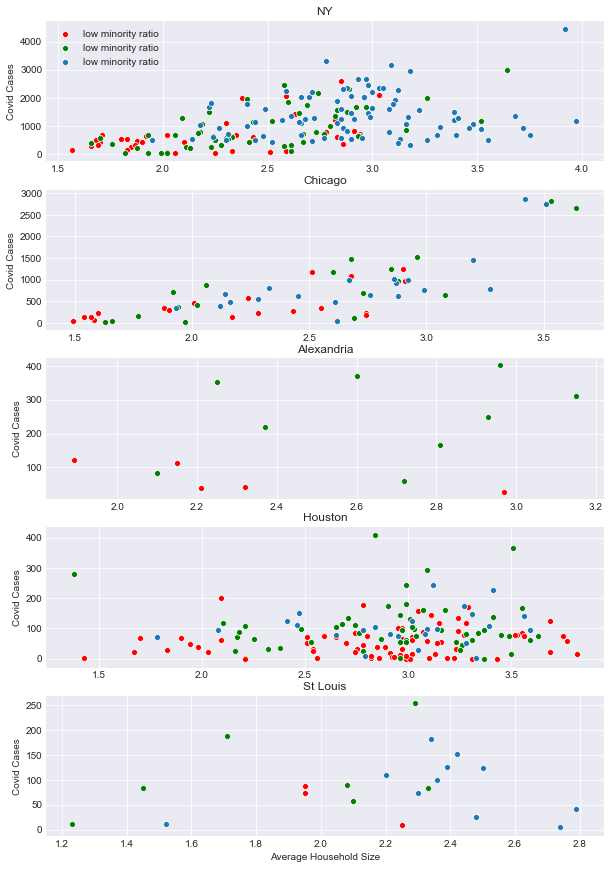

In [314]:
plt.figure(figsize=(10,15))
plt.subplot(511)
sns.scatterplot(data[(data['city']=='NY') & (data['minority strata']=='low')]['avg household size'], \
         data[(data['city']=='NY') & (data['minority strata']=='low')]['covid_cases'], color='red',label='low minority ratio')
sns.scatterplot(data[(data['city']=='NY') & (data['minority strata']=='medium')]['avg household size'], \
         data[(data['city']=='NY') & (data['minority strata']=='medium')]['covid_cases'], color='green',label='low minority ratio')
sns.scatterplot(data[(data['city']=='NY') & (data['minority strata']=='high')]['avg household size'], \
         data[(data['city']=='NY') & (data['minority strata']=='high')]['covid_cases'],label='low minority ratio')
plt.title('NY')
plt.xlabel(' ')
plt.legend()
plt.ylabel('Covid Cases')

plt.subplot(512)
sns.scatterplot(data[(data['city']=='Chicago') & (data['minority strata']=='low')]['avg household size'], \
         data[(data['city']=='Chicago') & (data['minority strata']=='low')]['covid_cases'], color='red')
sns.scatterplot(data[(data['city']=='Chicago') & (data['minority strata']=='medium')]['avg household size'], \
         data[(data['city']=='Chicago') & (data['minority strata']=='medium')]['covid_cases'], color='green')
sns.scatterplot(data[(data['city']=='Chicago') & (data['minority strata']=='high')]['avg household size'], \
         data[(data['city']=='Chicago') & (data['minority strata']=='high')]['covid_cases'])
plt.title('Chicago')
plt.xlabel(' ')
plt.ylabel('Covid Cases')


plt.subplot(513)
sns.scatterplot(data[(data['city']=='Alexandria') & (data['minority strata']=='low')]['avg household size'], \
         data[(data['city']=='Alexandria') & (data['minority strata']=='low')]['covid_cases'], color='red')
sns.scatterplot(data[(data['city']=='Alexandria') & (data['minority strata']=='medium')]['avg household size'], \
         data[(data['city']=='Alexandria') & (data['minority strata']=='medium')]['covid_cases'], color='green')
sns.scatterplot(data[(data['city']=='Alexandria') & (data['minority strata']=='high')]['avg household size'], \
         data[(data['city']=='Alexandria') & (data['minority strata']=='high')]['covid_cases'])
plt.title('Alexandria')
plt.xlabel(' ')
plt.ylabel('Covid Cases')


plt.subplot(514)
sns.scatterplot(data[(data['city']=='Houston') & (data['minority strata']=='low')]['avg household size'], \
         data[(data['city']=='Houston') & (data['minority strata']=='low')]['covid_cases'], color='red')
sns.scatterplot(data[(data['city']=='Houston') & (data['minority strata']=='medium')]['avg household size'], \
         data[(data['city']=='Houston') & (data['minority strata']=='medium')]['covid_cases'], color='green')
sns.scatterplot(data[(data['city']=='Houston') & (data['minority strata']=='high')]['avg household size'], \
         data[(data['city']=='Houston') & (data['minority strata']=='high')]['covid_cases'])
plt.title('Houston')
plt.xlabel(' ')
plt.ylabel('Covid Cases')


plt.subplot(515)
sns.scatterplot(data[(data['city']=='St Louis') & (data['minority strata']=='low')]['avg household size'], \
         data[(data['city']=='St Louis') & (data['minority strata']=='low')]['covid_cases'], color='red')
sns.scatterplot(data[(data['city']=='St Louis') & (data['minority strata']=='medium')]['avg household size'], \
         data[(data['city']=='St Louis') & (data['minority strata']=='medium')]['covid_cases'], color='green')
sns.scatterplot(data[(data['city']=='St Louis') & (data['minority strata']=='high')]['avg household size'], \
         data[(data['city']=='St Louis') & (data['minority strata']=='high')]['covid_cases'])
plt.title('St Louis')
plt.xlabel('Average Household Size')
plt.ylabel('Covid Cases')


plt.savefig(os.path.join(figures_dir, 'scatterplots_minority'),dpi=300)

In [315]:
city_list = list(data['city'].unique())
city_lookup = dict(zip(city_list, range(len(city_list))))
data['city number'] = data['city'].replace(city_lookup).values

In [316]:
income_strata_list = ['low','medium','high']
income_strata_lookup = dict(zip(income_strata_list, range(len(income_strata_list))))
data['income strata number'] = data['income strata'].replace(income_strata_lookup).values

In [317]:
minority_strata_list = ['low','medium','high']
minority_strata_lookup = dict(zip(minority_strata_list, range(len(minority_strata_list))))
data['minority strata number'] = data['minority strata'].replace(minority_strata_lookup).values

In [318]:
data.keys()

Index(['zipcode', 'covid_cases', 'avg household size', 'young prop',
       'elderly prop', 'service occupations', 'proportion minority',
       'population', 'covid rate', 'service prop', 'median income', 'city',
       'income strata', 'minority strata', 'city number',
       'income strata number', 'minority strata number'],
      dtype='object')

In [320]:
data['log_population'] = np.log(data['population'])
data['normalized avg household size'] = (data['avg household size'] - data['avg household size'].mean())/data['avg household size'].std()

In [331]:
with pm.Model() as model_low_income:
    
    curr_data = data[data['income strata']=='low']
    curr_city_list = list(curr_data['city'].unique())
    city_lookup_low = dict(zip(curr_city_list, range(len(curr_city_list))))
    curr_data['city number'] = curr_data['city'].replace(city_lookup_low).values
    
    # define priors, weakly informative 
    mu_b1 = pm.Normal('mu_b1', 0, 3)#, shape= (1,len(income_strata_list)))
    b0 = pm.Normal('beta0', 0, sigma=3, shape=(1,len(curr_city_list)))#,len(income_strata_list)))
    b1 = pm.Normal('beta1', mu_b1, sigma=3, shape=(1,len(curr_city_list)))#len(income_strata_list))
    
    theta = (b0[0,curr_data['city number']] +  b1[0,curr_data['city number']]*curr_data['avg household size'].values)
    
    mu = pm.Deterministic('mu', theta + curr_data['log_population'].values)
    
    ## Define Poisson likelihood
    y = pm.Poisson('y', mu=tt.exp(mu), observed=curr_data['covid_cases'].values)
    print(curr_city_list)



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])


['NY', 'Chicago', 'Houston', 'St Louis']


In [332]:
with pm.Model() as model_medium_income:
    
    curr_data = data[data['income strata']=='medium']
    curr_city_list = list(curr_data['city'].unique())
    city_lookup_med = dict(zip(curr_city_list, range(len(curr_city_list))))
    curr_data['city number'] = curr_data['city'].replace(city_lookup_med).values
    
    mu_b1 = pm.Normal('mu_b1', 0, 3)#, shape= (1,len(income_strata_list)))
    b0 = pm.Normal('beta0', 0, sigma=3, shape=len(curr_city_list))#,len(income_strata_list)))
    b1 = pm.Normal('beta1', mu_b1, sigma=3, shape=len(curr_city_list))
    
    theta = (b0[curr_data['city number']] +  b1[curr_data['city number']]*curr_data['avg household size'].values)
    
    mu = pm.Deterministic('mu', theta + curr_data['log_population'].values)
    
    
    ## Define Poisson likelihood
    y = pm.Poisson('y', mu=np.exp(mu), observed=curr_data['covid_cases'].values)
    

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [333]:
with pm.Model() as model_high_income:
    
    curr_data = data[data['income strata']=='high']
    curr_city_list = list(curr_data['city'].unique())
    city_lookup_high = dict(zip(curr_city_list, range(len(curr_city_list))))
    curr_data['city number'] = curr_data['city'].replace(city_lookup_high).values
    
    # define priors, weakly informative 
    mu_b1 = pm.Normal('mu_b1', 0, 3)#, shape= (1,len(income_strata_list)))
    b0 = pm.Normal('beta0', 0, sigma=3, shape=len(curr_city_list))#,len(income_strata_list)))
    b1 = pm.Normal('beta1', mu_b1, sigma=3, shape=len(curr_city_list))#len(income_strata_list))
    
    theta = (b0[curr_data['city number']] +  b1[curr_data['city number']]*curr_data['avg household size'].values)
    mu = pm.Deterministic('mu', theta + curr_data['log_population'].values)
    
    ## Define Poisson likelihood
    y = pm.Poisson('y', mu=np.exp(mu), observed=curr_data['covid_cases'].values)
    

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [325]:
with model_low_income:
    trc_model_low_income = pm.sample(2000, tune=3000, cores=4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta1, beta0, mu_b1]
Sampling 4 chains, 0 divergences: 100%|██████████| 20000/20000 [00:14<00:00, 1343.54draws/s]
/opt/anaconda3/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])


In [96]:
with model_medium_income:
    trc_model_medium_income = pm.sample(2000, tune=3000, cores=4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/opt/anaconda3/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta1, beta0, mu_b1]
Sampling 4 chains, 0 divergences: 100%|██████████| 20000/20000 [01:13<00:00, 273.37draws/s]
/opt/anaconda3/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__g

In [103]:
with model_high_income:
    trc_model_high_income = pm.sample(2000, tune=3000, cores=4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta1, beta0, mu_b1]
Sampling 4 chains, 0 divergences: 100%|██████████| 20000/20000 [01:15<00:00, 264.73draws/s]
/opt/anaconda3/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])


In [107]:
with open('./data/traces/trace_low_income.pkl', 'wb') as f:
    pickle.dump(trc_model_low_income, f)

In [108]:
with open('./data/traces/trace_medium_income.pkl', 'wb') as f:
    pickle.dump(trc_model_medium_income, f)

In [109]:
with open('./data/traces/trace_high_income.pkl', 'wb') as f:
    pickle.dump(trc_model_high_income, f)

In [380]:
with open('./data/traces/trace_low_income.pkl', 'rb') as f:
    trc_model_low_income = pickle.load(f)
    
with open('./data/traces/trace_medium_income.pkl', 'rb') as f:
    trc_model_medium_income = pickle.load(f)
    
with open('./data/traces/trace_high_income.pkl', 'rb') as f:
    trc_model_high_income = pickle.load(f)

In [381]:
sum_low = pm.summary(trc_model_low_income)
city_low = list(city_lookup_low.keys())
sum_low_short = sum_low[:9]#-len(data[data['income strata']=='low'])]
sum_low_short.index = ['mu_beta1', 'beta0_' + city_low[0], 'beta0_' + city_low[1],\
                 'beta0_' + city_low[2],\
                'beta0_' + city_low[3],'beta1_' + city_low[0], 'beta1_' + city_low[1],\
                 'beta1_' + city_low[2],\
                'beta1_' + city_low[3]]
sum_low_short[['mean','sd','hpd_3%','hpd_97%']]


/opt/anaconda3/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])


,mean,sd,hpd_3%,hpd_97%
mu_beta1,-0.035,1.362,-2.565,2.533
beta0_NY,-4.466,0.027,-4.515,-4.414
beta0_Chicago,-5.908,0.037,-5.980,-5.840
beta0_Houston,-5.293,0.093,-5.459,-5.113
beta0_St Louis,-2.826,0.170,-3.126,-2.488
beta1_NY,0.277,0.009,0.260,0.294
beta1_Chicago,0.666,0.012,0.642,0.688
beta1_Houston,-0.151,0.030,-0.211,-0.097
beta1_St Louis,-1.031,0.076,-1.177,-0.895


In [383]:
sum_medium = pm.summary(trc_model_medium_income)
city_medium = list(city_lookup_med.keys())
sum_medium_short = sum_medium[:11]
sum_medium_short.index = ['mu_beta1', 'beta0_' + city_medium[0], 'beta0_' + city_medium[1],\
                 'beta0_' + city_medium[2],\
                'beta0_' + city_medium[3], 'beta0_' + city_medium[4], 
                       'beta1_' + city_medium[0], 'beta1_' + city_medium[1],\
                 'beta1_' + city_medium[2],\
                'beta1_' + city_medium[3], 'beta1_' + city_medium[4]]
sum_medium_short[['mean','sd','hpd_3%','hpd_97%']]


/opt/anaconda3/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])


,mean,sd,hpd_3%,hpd_97%
mu_beta1,-0.270,1.230,-2.637,1.956
beta0_NY,-4.505,0.025,-4.551,-4.458
beta0_Chicago,-5.685,0.089,-5.849,-5.516
beta0_Alexandria,-4.321,0.392,-5.072,-3.600
beta0_Houston,-5.125,0.098,-5.315,-4.949
beta0_St Louis,-2.168,0.389,-2.883,-1.427
beta1_NY,0.280,0.009,0.263,0.296
beta1_Chicago,0.516,0.032,0.455,0.576
beta1_Alexandria,-0.055,0.142,-0.319,0.214
beta1_Houston,-0.322,0.034,-0.385,-0.260


In [385]:
sum_high = pm.summary(trc_model_high_income)
city_high = list(city_lookup_high.keys())
sum_high_short = sum_high[:9]
sum_high_short.index = ['mu_beta1', 'beta0_' + city_high[0], 'beta0_' + city_high[1],\
                 'beta0_' + city_high[2],\
                'beta0_' + city_high[3],'beta1_' + city_high[0], 'beta1_' + city_high[1],\
                 'beta1_' + city_high[2],\
                'beta1_' + city_high[3]]
sum_high_short[['mean','sd','hpd_3%','hpd_97%']]


/opt/anaconda3/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])


,mean,sd,hpd_3%,hpd_97%
mu_beta1,0.212,1.351,-2.262,2.764
beta0_NY,-5.643,0.024,-5.687,-5.598
beta0_Chicago,-6.200,0.099,-6.383,-6.014
beta0_Alexandria,-5.732,0.148,-6.010,-5.453
beta0_Houston,-5.238,0.137,-5.508,-4.993
beta1_NY,0.649,0.009,0.633,0.667
beta1_Chicago,0.633,0.047,0.546,0.722
beta1_Alexandria,0.268,0.056,0.165,0.376
beta1_Houston,-0.547,0.048,-0.637,-0.457


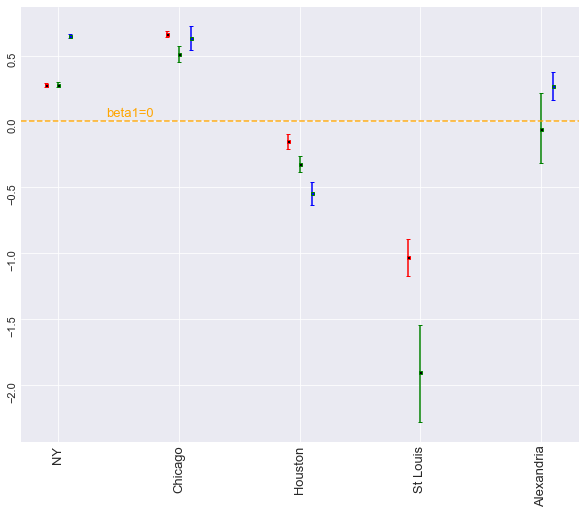

In [386]:
x_2 = np.arange(1.1, 6.1)
x_1 = (x_2 - 0.1)[:-1]
x_3 = x_1 + 0.2
x_3[-1] += 1

plt.figure(figsize=(10,8))

y_2 = sum_medium_short.loc[['beta1_NY','beta1_Chicago','beta1_Houston','beta1_St Louis','beta1_Alexandria'],'mean'].values
y_err_neg = y_2 - sum_medium_short.loc[['beta1_NY','beta1_Chicago','beta1_Houston','beta1_St Louis','beta1_Alexandria'],'hpd_3%'].values
y_err_pos = sum_medium_short.loc[['beta1_NY','beta1_Chicago','beta1_Houston','beta1_St Louis','beta1_Alexandria'],'hpd_97%'].values - y_2
y_err = np.concatenate([y_err_neg.reshape(1,-1), y_err_pos.reshape(1,-1)],axis=0)

medium_plot = plt.errorbar(x_2, y_2, y_err, color="green", capsize=2,linestyle="None",\
             marker="s", markersize=3, mfc="black", mec="green", label="medium income strata")

y_1 = sum_low_short.loc[['beta1_NY','beta1_Chicago','beta1_Houston','beta1_St Louis'],'mean'].values
y_err_neg = y_1 - sum_low_short.loc[['beta1_NY','beta1_Chicago','beta1_Houston','beta1_St Louis'],'hpd_3%'].values
y_err_pos = sum_low_short.loc[['beta1_NY','beta1_Chicago','beta1_Houston','beta1_St Louis'],'hpd_97%'].values - y_1
y_err = np.concatenate([y_err_neg.reshape(1,-1), y_err_pos.reshape(1,-1)],axis=0)

low_plot = plt.errorbar(x_1, y_1, y_err, color="red", capsize=2,linestyle="None",\
             marker="s", markersize=3, mfc="black", mec="red", label="low income strata")


y_3 = sum_high_short.loc[['beta1_NY','beta1_Chicago','beta1_Houston','beta1_Alexandria'],'mean'].values
y_err_neg = y_3 - sum_high_short.loc[['beta1_NY','beta1_Chicago','beta1_Houston','beta1_Alexandria'],'hpd_3%'].values
y_err_pos = sum_high_short.loc[['beta1_NY','beta1_Chicago','beta1_Houston','beta1_Alexandria'],'hpd_97%'].values - y_3
y_err = np.concatenate([y_err_neg.reshape(1,-1), y_err_pos.reshape(1,-1)],axis=0)

high_plot = plt.errorbar(x_3, y_3, y_err, color="blue", capsize=2,linestyle="None",\
             marker="s", markersize=3, mfc="blue", mec="green", label="high income strata")
plt.xticks(x_2, labels = ['NY','Chicago','Houston','St Louis','Alexandria'],rotation=90,fontsize=13)
plt.yticks(rotation=90,fontsize=11)
plt.axhline(0, color='orange',alpha=0.9, linestyle='--')
plt.text(1.5, 0.04, 'beta1=0', color='orange', fontsize=13)
plt.savefig(os.path.join(figures_dir, 'HPD_intervals'))

In [58]:
ppc_low_income = pm.sample_posterior_predictive(trc_model_low_income, samples=1000, model=model_low_income)
ppc_medium_income = pm.sample_posterior_predictive(trc_model_medium_income, samples=1000, model=model_medium_income)
ppc_high_income = pm.sample_posterior_predictive(trc_model_high_income, samples=1000, model=model_high_income)


/opt/anaconda3/lib/python3.7/site-packages/pymc3/sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
  0%|          | 0/1000 [00:00<?, ?it/s]/opt/anaconda3/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
100%|██████████| 1000/1000 [00:00<00:00, 1578.90it/s]


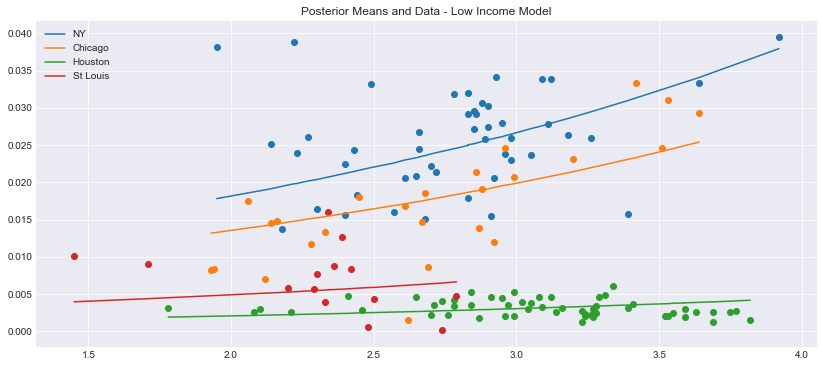

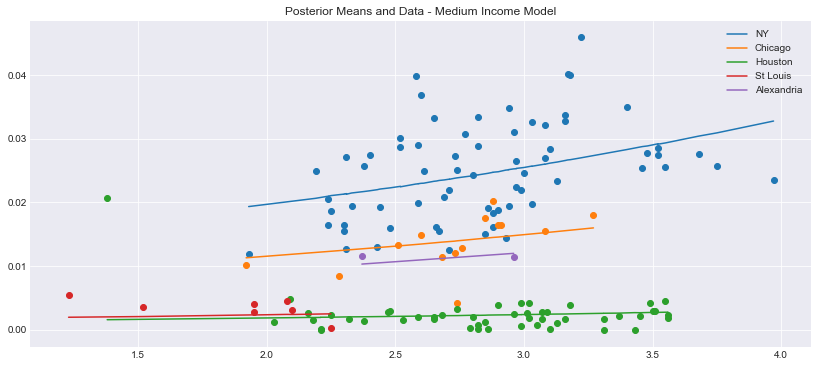

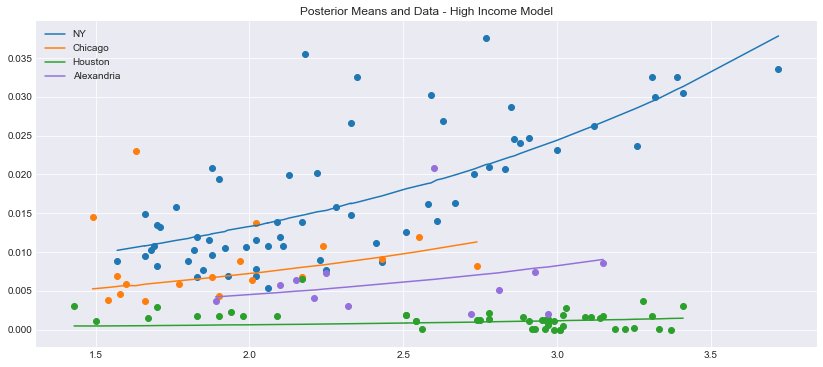

In [125]:
low_data = data[data['income strata']=='low']

NY_data = low_data[low_data['city'] == 'NY']
ppc_NY = ppc_low_income['y'][:,low_data['city'] == 'NY']
sorted_hh, sorted_ppc_NY_mean = zip(*sorted(zip(NY_data['avg household size'], ppc_NY.mean(axis=0)/NY_data['population']), key=lambda pair: pair[0]))
plt.plot(sorted_hh, sorted_ppc_NY_mean, label='NY')
plt.scatter(NY_data['avg household size'], NY_data['covid rate'])

Chicago_data = low_data[low_data['city'] == 'Chicago']
ppc_Chicago = ppc_low_income['y'][:,low_data['city'] == 'Chicago']
sorted_hh, sorted_ppc_Chicago_mean = zip(*sorted(zip(Chicago_data['avg household size'], ppc_Chicago.mean(axis=0)/Chicago_data['population']), key=lambda pair: pair[0]))
plt.plot(sorted_hh, sorted_ppc_Chicago_mean, label='Chicago')
plt.scatter(Chicago_data['avg household size'], Chicago_data['covid rate'])

Houston_data = low_data[low_data['city'] == 'Houston']
ppc_Houston = ppc_low_income['y'][:,low_data['city'] == 'Houston']
sorted_hh, sorted_ppc_Houston_mean = zip(*sorted(zip(Houston_data['avg household size'], ppc_Houston.mean(axis=0)/Houston_data['population']), key=lambda pair: pair[0]))
plt.plot(sorted_hh, sorted_ppc_Houston_mean, label='Houston')
plt.scatter(Houston_data['avg household size'], Houston_data['covid rate'])

St_louis_data = low_data[low_data['city'] == 'St Louis']
ppc_St_louis = ppc_low_income['y'][:,low_data['city'] == 'St Louis']
sorted_hh, sorted_ppc_St_louis_mean = zip(*sorted(zip(St_louis_data['avg household size'], ppc_St_louis.mean(axis=0)/St_louis_data['population']), key=lambda pair: pair[0]))
plt.plot(sorted_hh, sorted_ppc_St_louis_mean,  label='St Louis')
plt.scatter(St_louis_data['avg household size'], St_louis_data['covid rate'])
plt.legend()
plt.title('Posterior Means and Data - Low Income Model')
plt.savefig(os.path.join(figures_dir, 'posterior_means_scatter_low_income'),dpi=300)
plt.show()


medium_data = data[data['income strata']=='medium']

NY_data = medium_data[medium_data['city'] == 'NY']
ppc_NY = ppc_medium_income['y'][:,medium_data['city'] == 'NY']
sorted_hh, sorted_ppc_NY_mean = zip(*sorted(zip(NY_data['avg household size'], ppc_NY.mean(axis=0)/NY_data['population']), key=lambda pair: pair[0]))
plt.plot(sorted_hh, sorted_ppc_NY_mean, label='NY')
plt.scatter(NY_data['avg household size'], NY_data['covid rate'])

Chicago_data = medium_data[medium_data['city'] == 'Chicago']
ppc_Chicago = ppc_medium_income['y'][:,medium_data['city'] == 'Chicago']
sorted_hh, sorted_ppc_Chicago_mean = zip(*sorted(zip(Chicago_data['avg household size'], ppc_Chicago.mean(axis=0)/Chicago_data['population']), key=lambda pair: pair[0]))
plt.plot(sorted_hh, sorted_ppc_Chicago_mean, label='Chicago')
plt.scatter(Chicago_data['avg household size'], Chicago_data['covid rate'])

Houston_data = medium_data[medium_data['city'] == 'Houston']
ppc_Houston = ppc_medium_income['y'][:,medium_data['city'] == 'Houston']
sorted_hh, sorted_ppc_Houston_mean = zip(*sorted(zip(Houston_data['avg household size'], ppc_Houston.mean(axis=0)/Houston_data['population']), key=lambda pair: pair[0]))
plt.plot(sorted_hh, sorted_ppc_Houston_mean, label='Houston')
plt.scatter(Houston_data['avg household size'], Houston_data['covid rate'])

St_louis_data = medium_data[medium_data['city'] == 'St Louis']
ppc_St_louis = ppc_medium_income['y'][:,medium_data['city'] == 'St Louis']
sorted_hh, sorted_ppc_St_louis_mean = zip(*sorted(zip(St_louis_data['avg household size'], ppc_St_louis.mean(axis=0)/St_louis_data['population']), key=lambda pair: pair[0]))
plt.plot(sorted_hh, sorted_ppc_St_louis_mean,  label='St Louis')
plt.scatter(St_louis_data['avg household size'], St_louis_data['covid rate'])

Alexandria_data = medium_data[medium_data['city'] == 'Alexandria']
ppc_Alexandria = ppc_medium_income['y'][:,medium_data['city'] == 'Alexandria']
sorted_hh, sorted_ppc_Alexandria_mean = zip(*sorted(zip(Alexandria_data['avg household size'], ppc_Alexandria.mean(axis=0)/Alexandria_data['population']), key=lambda pair: pair[0]))
plt.plot(sorted_hh, sorted_ppc_Alexandria_mean, label='Alexandria')
plt.scatter(Alexandria_data['avg household size'], Alexandria_data['covid rate'])
plt.legend()
plt.title('Posterior Means and Data - Medium Income Model')
plt.savefig(os.path.join(figures_dir, 'posterior_means_scatter_medium_income'),dpi=300)
plt.show()

high_data = data[data['income strata']=='high']

NY_data = high_data[high_data['city'] == 'NY']
ppc_NY = ppc_high_income['y'][:,high_data['city'] == 'NY']
sorted_hh, sorted_ppc_NY_mean = zip(*sorted(zip(NY_data['avg household size'], ppc_NY.mean(axis=0)/NY_data['population']), key=lambda pair: pair[0]))
plt.plot(sorted_hh, sorted_ppc_NY_mean, label='NY')
plt.scatter(NY_data['avg household size'], NY_data['covid rate'])

Chicago_data = high_data[high_data['city'] == 'Chicago']
ppc_Chicago = ppc_high_income['y'][:,high_data['city'] == 'Chicago']
sorted_hh, sorted_ppc_Chicago_mean = zip(*sorted(zip(Chicago_data['avg household size'], ppc_Chicago.mean(axis=0)/Chicago_data['population']), key=lambda pair: pair[0]))
plt.plot(sorted_hh, sorted_ppc_Chicago_mean, label='Chicago')
plt.scatter(Chicago_data['avg household size'], Chicago_data['covid rate'])

Houston_data = high_data[high_data['city'] == 'Houston']
ppc_Houston = ppc_high_income['y'][:,high_data['city'] == 'Houston']
sorted_hh, sorted_ppc_Houston_mean = zip(*sorted(zip(Houston_data['avg household size'], ppc_Houston.mean(axis=0)/Houston_data['population']), key=lambda pair: pair[0]))
plt.plot(sorted_hh, sorted_ppc_Houston_mean, label='Houston')
plt.scatter(Houston_data['avg household size'], Houston_data['covid rate'])

Alexandria_data = high_data[high_data['city'] == 'Alexandria']
ppc_Alexandria = ppc_high_income['y'][:,high_data['city'] == 'Alexandria']
sorted_hh, sorted_ppc_Alexandria_mean = zip(*sorted(zip(Alexandria_data['avg household size'], ppc_Alexandria.mean(axis=0)/Alexandria_data['population']), key=lambda pair: pair[0]))
plt.plot(sorted_hh, sorted_ppc_Alexandria_mean, label='Alexandria',color='mediumpurple')
plt.scatter(Alexandria_data['avg household size'], Alexandria_data['covid rate'],color='mediumpurple')
plt.legend()
plt.title('Posterior Means and Data - High Income Model')
plt.savefig(os.path.join(figures_dir, 'posterior_means_scatter_high_income'),dpi=300)


plt.show()

Stratification

In [341]:
with pm.Model() as model_low_income2:
    
    curr_data = data[data['income strata']=='low']
    curr_city_list = list(curr_data['city'].unique())
    city_lookup_low = dict(zip(curr_city_list, range(len(curr_city_list))))
    curr_data['city number'] = curr_data['city'].replace(city_lookup_low).values
    
    # define priors, weakly informative 
    mu_b1 = pm.Normal('mu_b1', 0, 3)#, shape= (1,len(income_strata_list)))
    b0 = pm.Normal('beta0', 0, sigma=3, shape=(1,len(curr_city_list)))#,len(income_strata_list)))
    b1 = pm.Normal('beta1', mu_b1, sigma=3, shape=(1,len(curr_city_list)))#len(income_strata_list))
    b2 = pm.Normal('beta2', 0, sigma=3, shape=(1,len(curr_city_list)))
    b3 = pm.Normal('beta3', 0, sigma=3, shape=(1,len(curr_city_list)))
    b4 = pm.Normal('beta4', mu_b1, sigma=3, shape=(1,len(curr_city_list)))
    
    norm_avg_household_size = (curr_data['avg household size']-curr_data['avg household size'].mean())/curr_data['avg household size'].std()
    norm_service = (curr_data['service prop']-curr_data['service prop'].mean())/curr_data['service prop'].std()
    norm_young = (curr_data['young prop']-curr_data['young prop'].mean())/curr_data['young prop'].std()
    norm_elderly = (curr_data['elderly prop']-curr_data['elderly prop'].mean())/curr_data['elderly prop'].std()

    
    theta = (b0[0,curr_data['city number']] +  b1[0,curr_data['city number']]*norm_avg_household_size.values + \
            b2[0,curr_data['city number']]*norm_service.values + b3[0,curr_data['city number']]*norm_young.values + \
            b4[0,curr_data['city number']]*norm_elderly.values)
    
    mu = pm.Deterministic('mu', theta + curr_data['log_population'].values)
    
    ## Define Poisson likelihood
    y = pm.Poisson('y', mu=tt.exp(mu), observed=curr_data['covid_cases'].values)
    print(curr_city_list)



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])


['NY', 'Chicago', 'Houston', 'St Louis']


In [352]:
with pm.Model() as model_medium_income2:
    
    curr_data = data[data['income strata']=='medium']
    curr_city_list = list(curr_data['city'].unique())
    city_lookup_medium = dict(zip(curr_city_list, range(len(curr_city_list))))
    curr_data['city number'] = curr_data['city'].replace(city_lookup_medium).values
    
    # define priors, weakly informative 
    mu_b1 = pm.Normal('mu_b1', 0, 3)#, shape= (1,len(income_strata_list)))
    b0 = pm.Normal('beta0', 0, sigma=3, shape=(1,len(curr_city_list)))#,len(income_strata_list)))
    b1 = pm.Normal('beta1', mu_b1, sigma=3, shape=(1,len(curr_city_list)))#len(income_strata_list))
    b2 = pm.Normal('beta2', 0, sigma=3, shape=(1,len(curr_city_list)))
    b3 = pm.Normal('beta3', 0, sigma=3, shape=(1,len(curr_city_list)))
    b4 = pm.Normal('beta4', mu_b1, sigma=3, shape=(1,len(curr_city_list)))
    
    norm_avg_household_size = (curr_data['avg household size']-curr_data['avg household size'].mean())/curr_data['avg household size'].std()
    norm_service = (curr_data['service prop']-curr_data['service prop'].mean())/curr_data['service prop'].std()
    norm_young = (curr_data['young prop']-curr_data['young prop'].mean())/curr_data['young prop'].std()
    norm_elderly = (curr_data['elderly prop']-curr_data['elderly prop'].mean())/curr_data['elderly prop'].std()

    
    theta = (b0[0,curr_data['city number']] +  b1[0,curr_data['city number']]*norm_avg_household_size.values + \
            b2[0,curr_data['city number']]*norm_service.values + b3[0,curr_data['city number']]*norm_young.values + \
            b4[0,curr_data['city number']]*norm_elderly.values)
    
    mu = pm.Deterministic('mu', theta + curr_data['log_population'].values)
    
    ## Define Poisson likelihood
    y = pm.Poisson('y', mu=tt.exp(mu), observed=curr_data['covid_cases'].values)
    print(curr_city_list)



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


['NY', 'Chicago', 'Alexandria', 'Houston', 'St Louis']


/opt/anaconda3/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])


In [353]:
with pm.Model() as model_high_income2:
    
    curr_data = data[data['income strata']=='high']
    curr_city_list = list(curr_data['city'].unique())
    city_lookup_high = dict(zip(curr_city_list, range(len(curr_city_list))))
    curr_data['city number'] = curr_data['city'].replace(city_lookup_high).values
    
    # define priors, weakly informative 
    mu_b1 = pm.Normal('mu_b1', 0, 3)#, shape= (1,len(income_strata_list)))
    b0 = pm.Normal('beta0', 0, sigma=3, shape=(1,len(curr_city_list)))#,len(income_strata_list)))
    b1 = pm.Normal('beta1', mu_b1, sigma=3, shape=(1,len(curr_city_list)))#len(income_strata_list))
    b2 = pm.Normal('beta2', 0, sigma=3, shape=(1,len(curr_city_list)))
    b3 = pm.Normal('beta3', 0, sigma=3, shape=(1,len(curr_city_list)))
    b4 = pm.Normal('beta4', mu_b1, sigma=3, shape=(1,len(curr_city_list)))
    
    norm_avg_household_size = (curr_data['avg household size']-curr_data['avg household size'].mean())/curr_data['avg household size'].std()
    norm_service = (curr_data['service prop']-curr_data['service prop'].mean())/curr_data['service prop'].std()
    norm_young = (curr_data['young prop']-curr_data['young prop'].mean())/curr_data['young prop'].std()
    norm_elderly = (curr_data['elderly prop']-curr_data['elderly prop'].mean())/curr_data['elderly prop'].std()

    
    theta = (b0[0,curr_data['city number']] +  b1[0,curr_data['city number']]*norm_avg_household_size.values + \
            b2[0,curr_data['city number']]*norm_service.values + b3[0,curr_data['city number']]*norm_young.values + \
            b4[0,curr_data['city number']]*norm_elderly.values)
    
    mu = pm.Deterministic('mu', theta + curr_data['log_population'].values)
    
    ## Define Poisson likelihood
    y = pm.Poisson('y', mu=tt.exp(mu), observed=curr_data['covid_cases'].values)
    print(curr_city_list)



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


['NY', 'Chicago', 'Alexandria', 'Houston']


In [342]:
with model_low_income2:
    trc_model_low_income2 = pm.sample(2000, tune=3000, cores=4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/opt/anaconda3/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta4, beta3, beta2, beta1, beta0, mu_b1]
/opt/anaconda3/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
Sampling 4 chains, 0 divergences: 100%|██████████|

In [354]:
with model_medium_income2:
    trc_model_medium_income2 = pm.sample(2000, tune=3000, cores=4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta4, beta3, beta2, beta1, beta0, mu_b1]
Sampling 4 chains, 0 divergences: 100%|██████████| 20000/20000 [06:59<00:00, 47.72draws/s]
/opt/anaconda3/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
/opt/anaconda3/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  

In [355]:
with model_high_income2:
    trc_model_high_income2 = pm.sample(2000, tune=3000, cores=4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta4, beta3, beta2, beta1, beta0, mu_b1]
Sampling 4 chains, 0 divergences: 100%|██████████| 20000/20000 [01:15<00:00, 265.27draws/s]
/opt/anaconda3/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])


In [357]:
with open('./data/traces/trace_low_income2.pkl', 'wb') as f:
    pickle.dump(trc_model_low_income2, f)
    
with open('./data/traces/trace_medium_income2.pkl', 'wb') as f:
    pickle.dump(trc_model_medium_income2, f) 
    
with open('./data/traces/trace_high_income2.pkl', 'wb') as f:
    pickle.dump(trc_model_high_income2, f) 

In [ ]:
with open('./data/traces/trace_low_income2.pkl', 'rb') as f:
    trc_model_low_income2 = pickle.load(f)
    
with open('./data/traces/trace_medium_income2.pkl', 'rb') as f:
    trc_model_medium_income2 = pickle.load(f)
    
with open('./data/traces/trace_high_income2.pkl', 'rb') as f:
    trc_model_high_income2 = pickle.load(f)

In [369]:
sum_low = pm.summary(trc_model_low_income2)
city_low = list(city_lookup_low.keys())
sum_low_short = sum_low[:9]#-len(data[data['income strata']=='low'])]
sum_low_short.index = ['mu_beta1', 'beta0_' + city_low[0], 'beta0_' + city_low[1],\
                 'beta0_' + city_low[2],\
                'beta0_' + city_low[3],'beta1_' + city_low[0], 'beta1_' + city_low[1],\
                 'beta1_' + city_low[2],\
                'beta1_' + city_low[3]]
sum_low_short[['mean','sd','hpd_3%','hpd_97%']]


/opt/anaconda3/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])


,mean,sd,hpd_3%,hpd_97%
mu_beta1,-0.001,1.008,-1.840,1.937
beta0_NY,-3.787,0.005,-3.797,-3.778
beta0_Chicago,-3.936,0.010,-3.955,-3.918
beta0_Houston,-5.560,0.019,-5.595,-5.524
beta0_St Louis,-6.280,0.102,-6.473,-6.091
beta1_NY,0.014,0.006,0.003,0.025
beta1_Chicago,0.223,0.011,0.201,0.243
beta1_Houston,0.022,0.025,-0.023,0.071
beta1_St Louis,-0.894,0.094,-1.066,-0.718


In [370]:
sum_medium = pm.summary(trc_model_medium_income2)
city_medium = list(city_lookup_medium.keys())
sum_medium_short = sum_low[:11]
sum_medium_short.index = ['mu_beta1', 'beta0_' + city_medium[0], 'beta0_' + city_medium[1],\
                 'beta0_' + city_medium[2],\
                'beta0_' + city_medium[3],'beta0_' + city_medium[4],\
                          'beta1_' + city_medium[0], 'beta1_' + city_medium[1],\
                 'beta1_' + city_medium[2],\
                'beta1_' + city_medium[3],'beta1_' + city_medium[4]]
sum_medium_short[['mean','sd','hpd_3%','hpd_97%']]


/opt/anaconda3/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])


,mean,sd,hpd_3%,hpd_97%
mu_beta1,-0.001,1.008,-1.840,1.937
beta0_NY,-3.787,0.005,-3.797,-3.778
beta0_Chicago,-3.936,0.010,-3.955,-3.918
beta0_Alexandria,-5.560,0.019,-5.595,-5.524
beta0_Houston,-6.280,0.102,-6.473,-6.091
beta0_St Louis,0.014,0.006,0.003,0.025
beta1_NY,0.223,0.011,0.201,0.243
beta1_Chicago,0.022,0.025,-0.023,0.071
beta1_Alexandria,-0.894,0.094,-1.066,-0.718
beta1_Houston,0.141,0.004,0.133,0.148


In [359]:
sum_high = pm.summary(trc_model_high_income2)
city_high = list(city_lookup_high.keys())
sum_high_short = sum_low[:9]
sum_high_short.index = ['mu_beta1', 'beta0_' + city_high[0], 'beta0_' + city_high[1],\
                 'beta0_' + city_high[2],\
                'beta0_' + city_high[3],'beta1_' + city_high[0], 'beta1_' + city_high[1],\
                 'beta1_' + city_high[2],\
                'beta1_' + city_high[3]]
sum_high_short[['mean','sd','hpd_3%','hpd_97%']]


/opt/anaconda3/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])


,mean,sd,hpd_3%,hpd_97%
mu_beta1,-0.001,1.008,-1.840,1.937
beta0_NY,-3.787,0.005,-3.797,-3.778
beta0_Chicago,-3.936,0.010,-3.955,-3.918
beta0_Alexandria,-5.560,0.019,-5.595,-5.524
beta0_Houston,-6.280,0.102,-6.473,-6.091
beta1_NY,0.014,0.006,0.003,0.025
beta1_Chicago,0.223,0.011,0.201,0.243
beta1_Alexandria,0.022,0.025,-0.023,0.071
beta1_Houston,-0.894,0.094,-1.066,-0.718


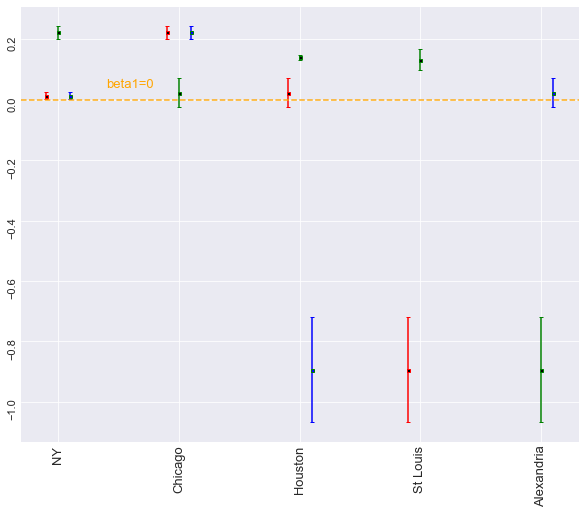

In [371]:
x_2 = np.arange(1.1, 6.1)
x_1 = (x_2 - 0.1)[:-1]
x_3 = x_1 + 0.2
x_3[-1] += 1

plt.figure(figsize=(10,8))

y_2 = sum_medium_short.loc[['beta1_NY','beta1_Chicago','beta1_Houston','beta1_St Louis','beta1_Alexandria'],'mean'].values
y_err_neg = y_2 - sum_medium_short.loc[['beta1_NY','beta1_Chicago','beta1_Houston','beta1_St Louis','beta1_Alexandria'],'hpd_3%'].values
y_err_pos = sum_medium_short.loc[['beta1_NY','beta1_Chicago','beta1_Houston','beta1_St Louis','beta1_Alexandria'],'hpd_97%'].values - y_2
y_err = np.concatenate([y_err_neg.reshape(1,-1), y_err_pos.reshape(1,-1)],axis=0)

plt.errorbar(x_2, y_2, y_err, color="green", capsize=2,linestyle="None",\
             marker="s", markersize=3, mfc="black", mec="green")

y_1 = sum_low_short.loc[['beta1_NY','beta1_Chicago','beta1_Houston','beta1_St Louis'],'mean'].values
y_err_neg = y_1 - sum_low_short.loc[['beta1_NY','beta1_Chicago','beta1_Houston','beta1_St Louis'],'hpd_3%'].values
y_err_pos = sum_low_short.loc[['beta1_NY','beta1_Chicago','beta1_Houston','beta1_St Louis'],'hpd_97%'].values - y_1
y_err = np.concatenate([y_err_neg.reshape(1,-1), y_err_pos.reshape(1,-1)],axis=0)

plt.errorbar(x_1, y_1, y_err, color="red", capsize=2,linestyle="None",\
             marker="s", markersize=3, mfc="black", mec="red")



y_3 = sum_high_short.loc[['beta1_NY','beta1_Chicago','beta1_Houston','beta1_Alexandria'],'mean'].values
y_err_neg = y_3 - sum_high_short.loc[['beta1_NY','beta1_Chicago','beta1_Houston','beta1_Alexandria'],'hpd_3%'].values
y_err_pos = sum_high_short.loc[['beta1_NY','beta1_Chicago','beta1_Houston','beta1_Alexandria'],'hpd_97%'].values - y_3
y_err = np.concatenate([y_err_neg.reshape(1,-1), y_err_pos.reshape(1,-1)],axis=0)

plt.errorbar(x_3, y_3, y_err, color="blue", capsize=2,linestyle="None",\
             marker="s", markersize=3, mfc="blue", mec="green")
plt.xticks(x_2, labels = ['NY','Chicago','Houston','St Louis','Alexandria'],rotation=90,fontsize=13)
plt.yticks(rotation=90,fontsize=11)
plt.axhline(0, color='orange',alpha=0.9, linestyle='--')
plt.text(1.5, 0.04, 'beta1=0', color='orange', fontsize=13)
plt.savefig(os.path.join(figures_dir, 'HPD_intervals2'))

In [387]:
ppc_low_income2 = pm.sample_posterior_predictive(trc_model_low_income2, samples=1000, model=model_low_income2)
ppc_medium_income2 = pm.sample_posterior_predictive(trc_model_medium_income2, samples=1000, model=model_medium_income2)
ppc_high_income2 = pm.sample_posterior_predictive(trc_model_high_income2, samples=1000, model=model_high_income2)


/opt/anaconda3/lib/python3.7/site-packages/pymc3/sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
  0%|          | 0/1000 [00:00<?, ?it/s]/opt/anaconda3/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
100%|██████████| 1000/1000 [00:02<00:00, 419.60it/s]


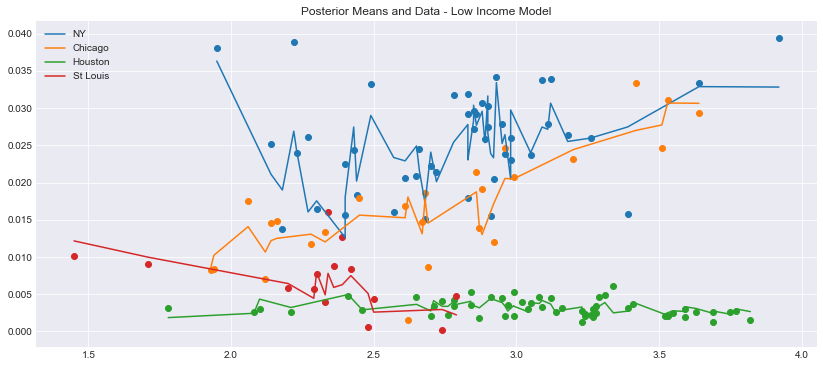

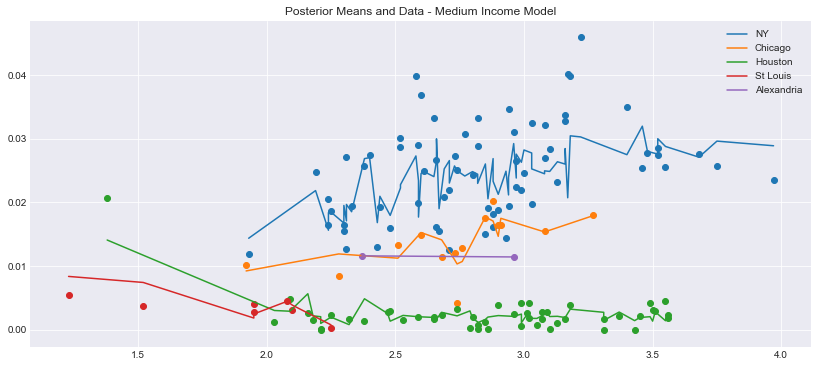

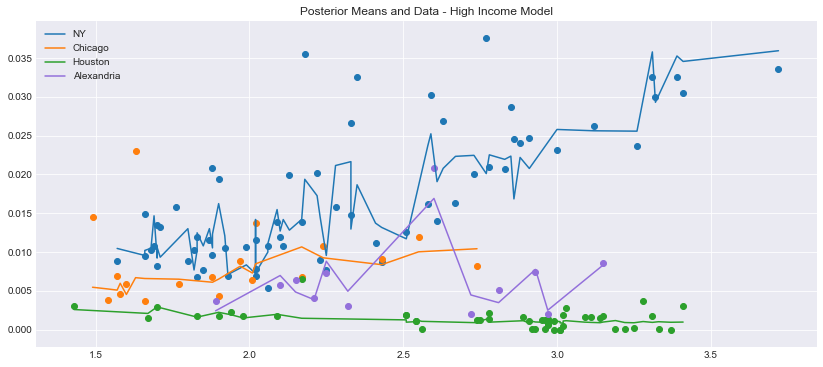

In [388]:
low_data = data[data['income strata']=='low']

NY_data = low_data[low_data['city'] == 'NY']
ppc_NY = ppc_low_income2['y'][:,low_data['city'] == 'NY']
sorted_hh, sorted_ppc_NY_mean = zip(*sorted(zip(NY_data['avg household size'], ppc_NY.mean(axis=0)/NY_data['population']), key=lambda pair: pair[0]))
plt.plot(sorted_hh, sorted_ppc_NY_mean, label='NY')
plt.scatter(NY_data['avg household size'], NY_data['covid rate'])

Chicago_data = low_data[low_data['city'] == 'Chicago']
ppc_Chicago = ppc_low_income2['y'][:,low_data['city'] == 'Chicago']
sorted_hh, sorted_ppc_Chicago_mean = zip(*sorted(zip(Chicago_data['avg household size'], ppc_Chicago.mean(axis=0)/Chicago_data['population']), key=lambda pair: pair[0]))
plt.plot(sorted_hh, sorted_ppc_Chicago_mean, label='Chicago')
plt.scatter(Chicago_data['avg household size'], Chicago_data['covid rate'])

Houston_data = low_data[low_data['city'] == 'Houston']
ppc_Houston = ppc_low_income2['y'][:,low_data['city'] == 'Houston']
sorted_hh, sorted_ppc_Houston_mean = zip(*sorted(zip(Houston_data['avg household size'], ppc_Houston.mean(axis=0)/Houston_data['population']), key=lambda pair: pair[0]))
plt.plot(sorted_hh, sorted_ppc_Houston_mean, label='Houston')
plt.scatter(Houston_data['avg household size'], Houston_data['covid rate'])

St_louis_data = low_data[low_data['city'] == 'St Louis']
ppc_St_louis = ppc_low_income2['y'][:,low_data['city'] == 'St Louis']
sorted_hh, sorted_ppc_St_louis_mean = zip(*sorted(zip(St_louis_data['avg household size'], ppc_St_louis.mean(axis=0)/St_louis_data['population']), key=lambda pair: pair[0]))
plt.plot(sorted_hh, sorted_ppc_St_louis_mean,  label='St Louis')
plt.scatter(St_louis_data['avg household size'], St_louis_data['covid rate'])
plt.legend()
plt.title('Posterior Means and Data - Low Income Model')
plt.savefig(os.path.join(figures_dir, 'posterior_means_scatter_low_income2'),dpi=300)
plt.show()


medium_data = data[data['income strata']=='medium']

NY_data = medium_data[medium_data['city'] == 'NY']
ppc_NY = ppc_medium_income2['y'][:,medium_data['city'] == 'NY']
sorted_hh, sorted_ppc_NY_mean = zip(*sorted(zip(NY_data['avg household size'], ppc_NY.mean(axis=0)/NY_data['population']), key=lambda pair: pair[0]))
plt.plot(sorted_hh, sorted_ppc_NY_mean, label='NY')
plt.scatter(NY_data['avg household size'], NY_data['covid rate'])

Chicago_data = medium_data[medium_data['city'] == 'Chicago']
ppc_Chicago = ppc_medium_income2['y'][:,medium_data['city'] == 'Chicago']
sorted_hh, sorted_ppc_Chicago_mean = zip(*sorted(zip(Chicago_data['avg household size'], ppc_Chicago.mean(axis=0)/Chicago_data['population']), key=lambda pair: pair[0]))
plt.plot(sorted_hh, sorted_ppc_Chicago_mean, label='Chicago')
plt.scatter(Chicago_data['avg household size'], Chicago_data['covid rate'])

Houston_data = medium_data[medium_data['city'] == 'Houston']
ppc_Houston = ppc_medium_income2['y'][:,medium_data['city'] == 'Houston']
sorted_hh, sorted_ppc_Houston_mean = zip(*sorted(zip(Houston_data['avg household size'], ppc_Houston.mean(axis=0)/Houston_data['population']), key=lambda pair: pair[0]))
plt.plot(sorted_hh, sorted_ppc_Houston_mean, label='Houston')
plt.scatter(Houston_data['avg household size'], Houston_data['covid rate'])

St_louis_data = medium_data[medium_data['city'] == 'St Louis']
ppc_St_louis = ppc_medium_income2['y'][:,medium_data['city'] == 'St Louis']
sorted_hh, sorted_ppc_St_louis_mean = zip(*sorted(zip(St_louis_data['avg household size'], ppc_St_louis.mean(axis=0)/St_louis_data['population']), key=lambda pair: pair[0]))
plt.plot(sorted_hh, sorted_ppc_St_louis_mean,  label='St Louis')
plt.scatter(St_louis_data['avg household size'], St_louis_data['covid rate'])

Alexandria_data = medium_data[medium_data['city'] == 'Alexandria']
ppc_Alexandria = ppc_medium_income2['y'][:,medium_data['city'] == 'Alexandria']
sorted_hh, sorted_ppc_Alexandria_mean = zip(*sorted(zip(Alexandria_data['avg household size'], ppc_Alexandria.mean(axis=0)/Alexandria_data['population']), key=lambda pair: pair[0]))
plt.plot(sorted_hh, sorted_ppc_Alexandria_mean, label='Alexandria')
plt.scatter(Alexandria_data['avg household size'], Alexandria_data['covid rate'])
plt.legend()
plt.title('Posterior Means and Data - Medium Income Model')
plt.savefig(os.path.join(figures_dir, 'posterior_means_scatter_medium_income2'),dpi=300)
plt.show()

high_data = data[data['income strata']=='high']

NY_data = high_data[high_data['city'] == 'NY']
ppc_NY = ppc_high_income2['y'][:,high_data['city'] == 'NY']
sorted_hh, sorted_ppc_NY_mean = zip(*sorted(zip(NY_data['avg household size'], ppc_NY.mean(axis=0)/NY_data['population']), key=lambda pair: pair[0]))
plt.plot(sorted_hh, sorted_ppc_NY_mean, label='NY')
plt.scatter(NY_data['avg household size'], NY_data['covid rate'])

Chicago_data = high_data[high_data['city'] == 'Chicago']
ppc_Chicago = ppc_high_income2['y'][:,high_data['city'] == 'Chicago']
sorted_hh, sorted_ppc_Chicago_mean = zip(*sorted(zip(Chicago_data['avg household size'], ppc_Chicago.mean(axis=0)/Chicago_data['population']), key=lambda pair: pair[0]))
plt.plot(sorted_hh, sorted_ppc_Chicago_mean, label='Chicago')
plt.scatter(Chicago_data['avg household size'], Chicago_data['covid rate'])

Houston_data = high_data[high_data['city'] == 'Houston']
ppc_Houston = ppc_high_income2['y'][:,high_data['city'] == 'Houston']
sorted_hh, sorted_ppc_Houston_mean = zip(*sorted(zip(Houston_data['avg household size'], ppc_Houston.mean(axis=0)/Houston_data['population']), key=lambda pair: pair[0]))
plt.plot(sorted_hh, sorted_ppc_Houston_mean, label='Houston')
plt.scatter(Houston_data['avg household size'], Houston_data['covid rate'])

Alexandria_data = high_data[high_data['city'] == 'Alexandria']
ppc_Alexandria = ppc_high_income2['y'][:,high_data['city'] == 'Alexandria']
sorted_hh, sorted_ppc_Alexandria_mean = zip(*sorted(zip(Alexandria_data['avg household size'], ppc_Alexandria.mean(axis=0)/Alexandria_data['population']), key=lambda pair: pair[0]))
plt.plot(sorted_hh, sorted_ppc_Alexandria_mean, label='Alexandria',color='mediumpurple')
plt.scatter(Alexandria_data['avg household size'], Alexandria_data['covid rate'],color='mediumpurple')
plt.legend()
plt.title('Posterior Means and Data - High Income Model')
plt.savefig(os.path.join(figures_dir, 'posterior_means_scatter_high_income2'),dpi=300)


plt.show()

/opt/anaconda3/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/opt/anaconda3/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/opt/anaconda3/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/opt/anaconda3/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend

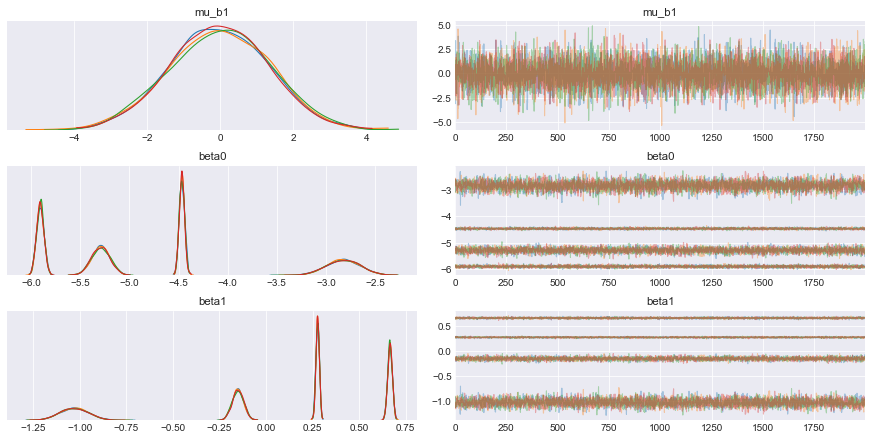

In [89]:
fig = pm.traceplot(trc_model_low_income, var_names = ['mu_b1','beta0','beta1'])
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/opt/anaconda3/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/opt/anaconda3/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/opt/anaconda3/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend

/opt/anaconda3/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/opt/anaconda3/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/opt/anaconda3/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/opt/anaconda3/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend

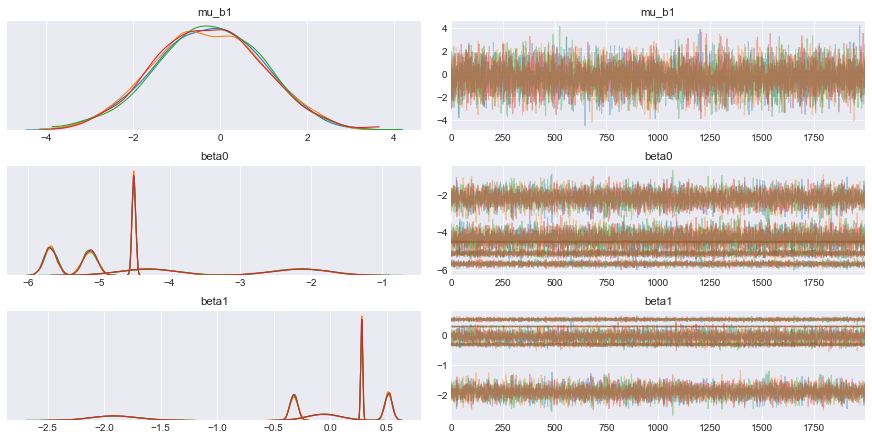

In [105]:
fig = pm.traceplot(trc_model_medium_income, var_names = ['mu_b1','beta0','beta1'])
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
/opt/anaconda3/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/opt/anaconda3/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/opt/anaconda3/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.p

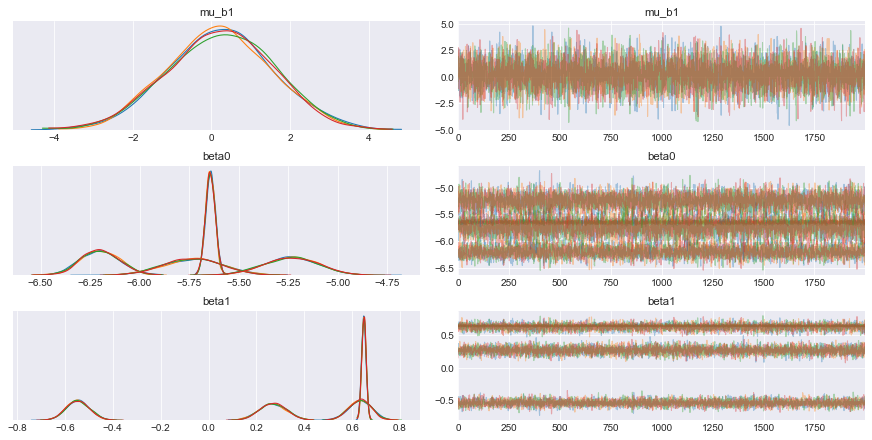

In [106]:
fig = pm.traceplot(trc_model_high_income, var_names = ['mu_b1','beta0','beta1'])
plt.show()

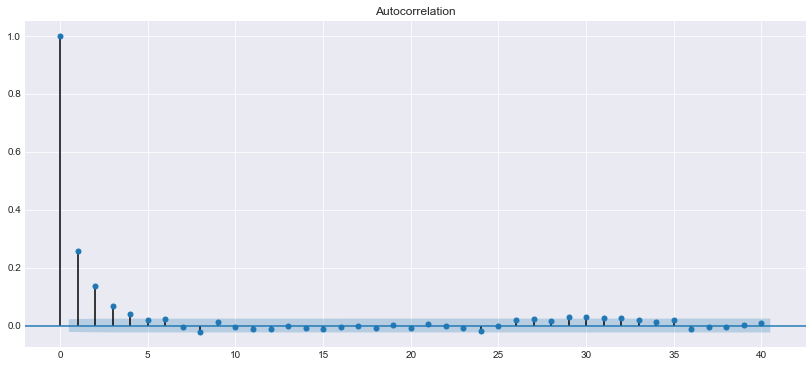

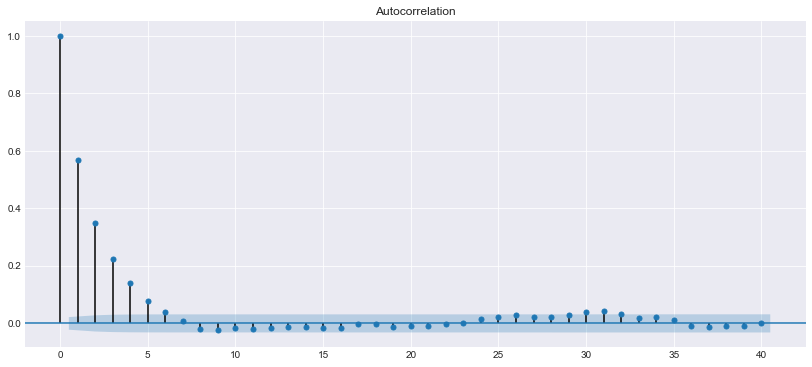

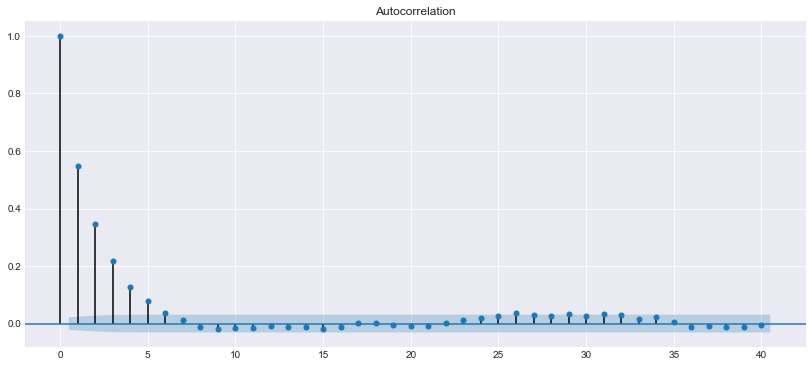

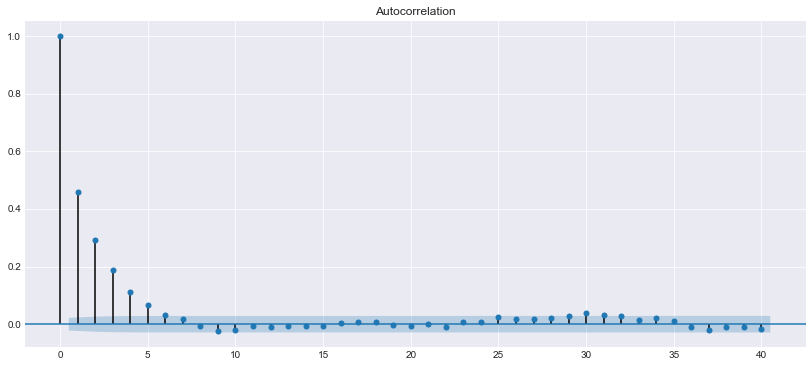

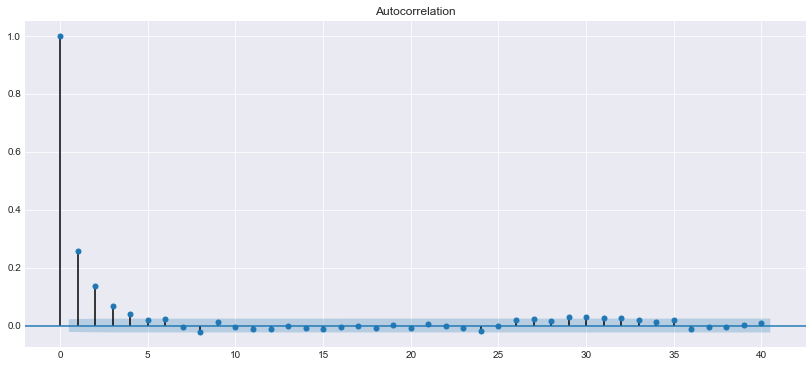

In [60]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(trc_model_low_income['beta0'][:,0,0])
plot_acf(trc_model_low_income['beta0'][:,0,1])
plot_acf(trc_model_low_income['beta0'][:,0,2])
plot_acf(trc_model_low_income['beta0'][:,0,3])